In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D


In [2]:
DatabaseDF = pd.read_csv('../CleanedDataset.csv')
DatabaseDF.head()

Unnamed: 0    Operator Well Name Formation  Lateral Length  Stages  \
0           0  Operator 1    Well 1       MBH          5114.0    30.0   
1           1  Operator 2    Well 2       MBH          5181.0     NaN   
2           2  Operator 2    Well 3       MBH          4780.0    15.0   
3           3  Operator 1    Well 4       MBH         10654.0     1.0   
4           4  Operator 2    Well 5       MBH          5209.0     1.0   

   Township   Range  Section  Total Prop, lbs  ...  Fluid Type from DI  \
0        141     99       10              0.0  ...                 NaN   
1        142     99       16         418000.0  ...                 NaN   
2        142     99       24         568407.0  ...                 NaN   
3        142     99        1         845000.0  ...                 NaN   
4        142     99       35         297366.0  ...                 NaN   

  SPACING_CAPPED  12 month Cum Prod  Completion Type  Sleeves  P&P  \
0          660.0              33.55              NaN      NaN  NaN   
1          660.0              27.62              NaN      NaN  NaN   
2          660.0              11.19               OH      NaN  NaN   
3          660.0              27.85              NaN      NaN  NaN   
4          660.0              50.88               OH      NaN  NaN   

   Frac Ports Repeater Ports  CT  Year Drilled  
0         NaN            NaN NaN        2006.0  
1         NaN            NaN NaN        2005.0  
2         NaN            NaN NaN        2006.0  
3         NaN            NaN NaN        2007.0  
4         NaN            NaN NaN        2006.0  

[5 rows x 30 columns]

Fistly I want to test if there is a clear preference to which completion type is used

In [3]:
DatabaseDF['Completion Type'].value_counts()

P & P                            4845
Sleeves                          4250
OH                                687
Sleeves and P & P                 360
Cemented Liner                     18
CT                                 14
Frac Ports                          7
Frac Ports and P & P                7
Frac Ports and Repeater Ports       3
Perforated Liner                    2
Repeater Ports and P & P            2
Screen                              2
P & P and CT                        1
Name: Completion Type, dtype: int64

By far and away the most common completion type is P&P, with Sleeves being a close second. Now I will compare how each completion type compares to total oil produced

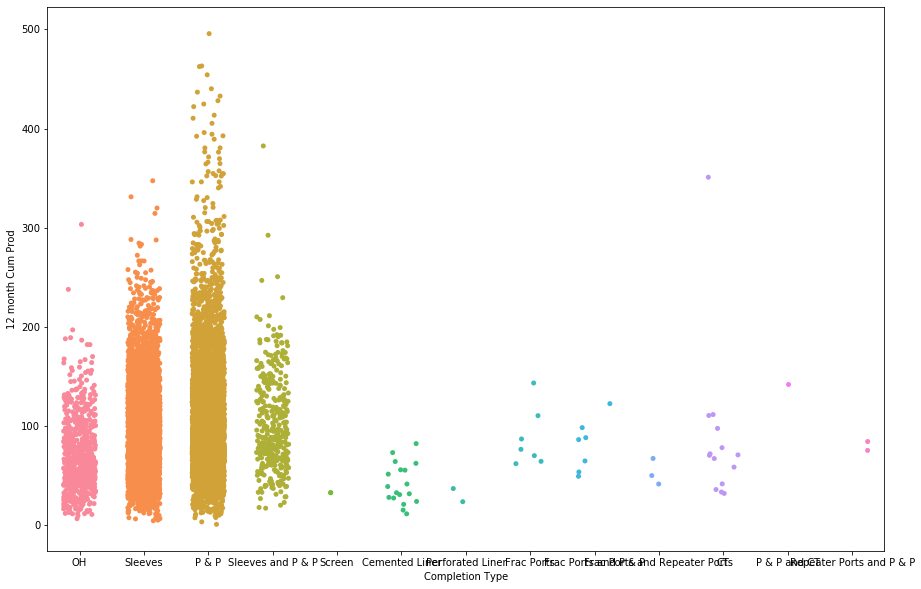

In [4]:
plt.subplots(figsize = (15,10))
sns.stripplot(x = 'Completion Type', y = '12 month Cum Prod', data = DatabaseDF, jitter = .25)

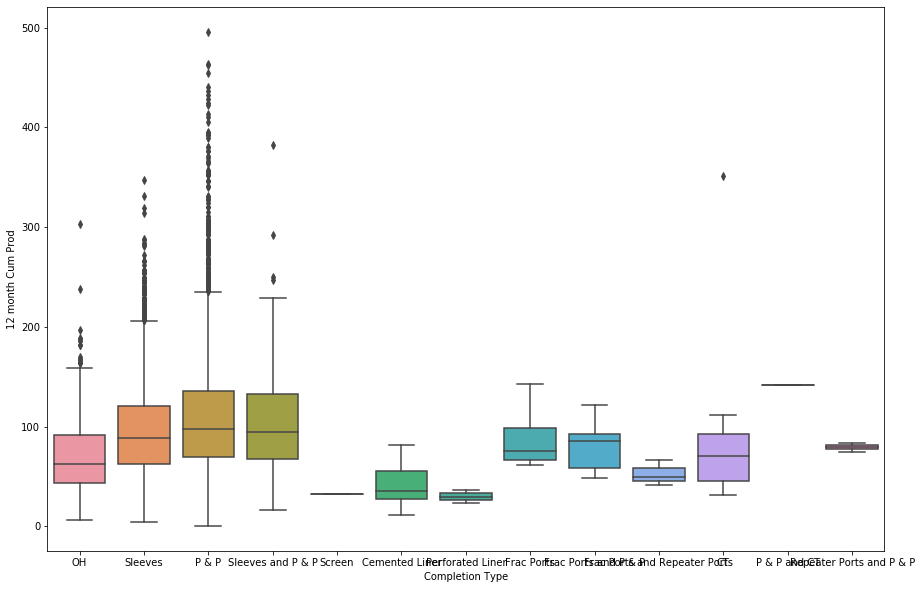

In [5]:
plt.subplots(figsize = (15,10))
sns.boxplot(x = 'Completion Type', y = '12 month Cum Prod', data = DatabaseDF, orient = 'v')

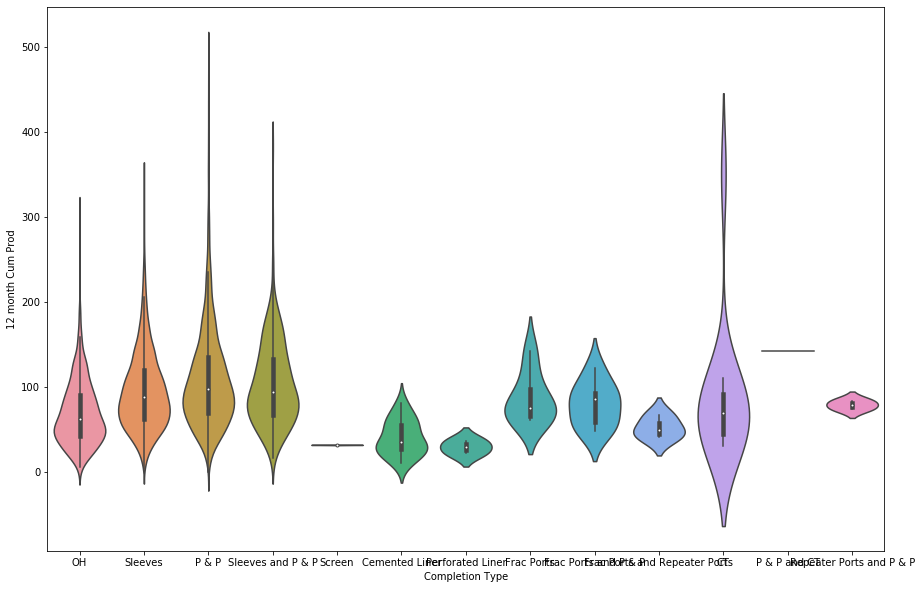

In [6]:
plt.subplots(figsize = (15,10))
sns.violinplot(x = 'Completion Type', y = '12 month Cum Prod', data = DatabaseDF, scale = 'width')

These graphs show that on average P&P is the highest producint followed by P&P and sleeves then sleeves. There are some other plots which have higher means or higher percentiles however these have very few entries and I will focus on them less than the ones which have lots of values. It is also clear by looking at this that thre are lots of outliers in every group.

In [7]:
FilterList = ['P & P', 'Sleeves', 'Sleeves and P & P', 'OH']

filteredDF = DatabaseDF[DatabaseDF['Completion Type'].isin(FilterList)]

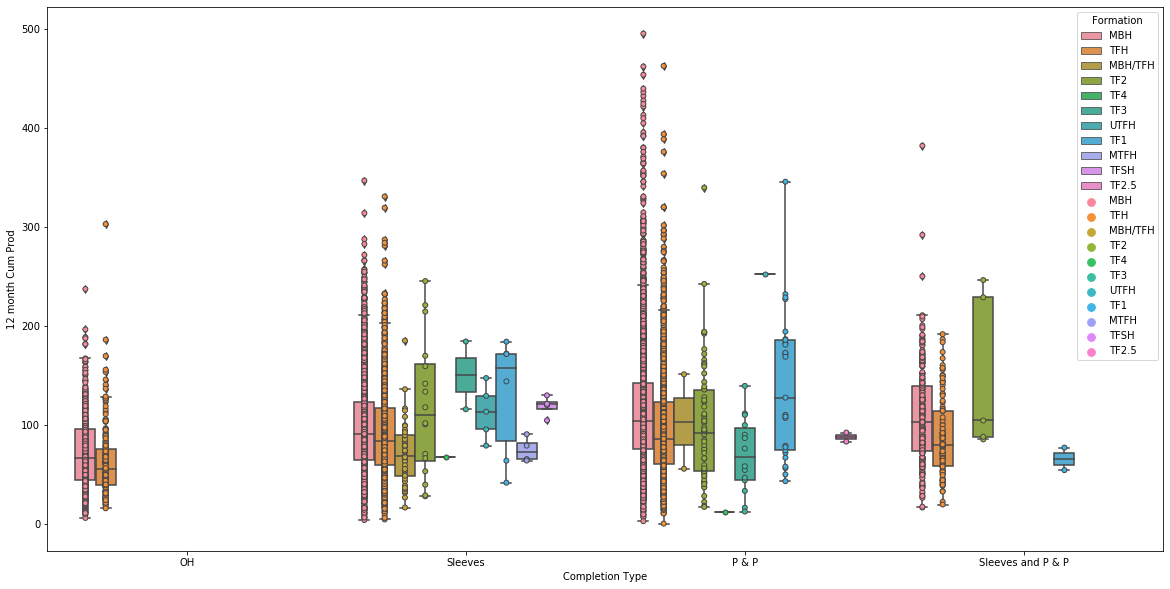

In [8]:
plt.subplots(figsize = (20,10))
sns.stripplot(x = 'Completion Type', y = '12 month Cum Prod', data = filteredDF, 
                hue = 'Formation' , jitter = 0 , dodge = True, linewidth = 1)
sns.boxplot(x = 'Completion Type', y = '12 month Cum Prod', data = filteredDF,
                hue = 'Formation', dodge = True)

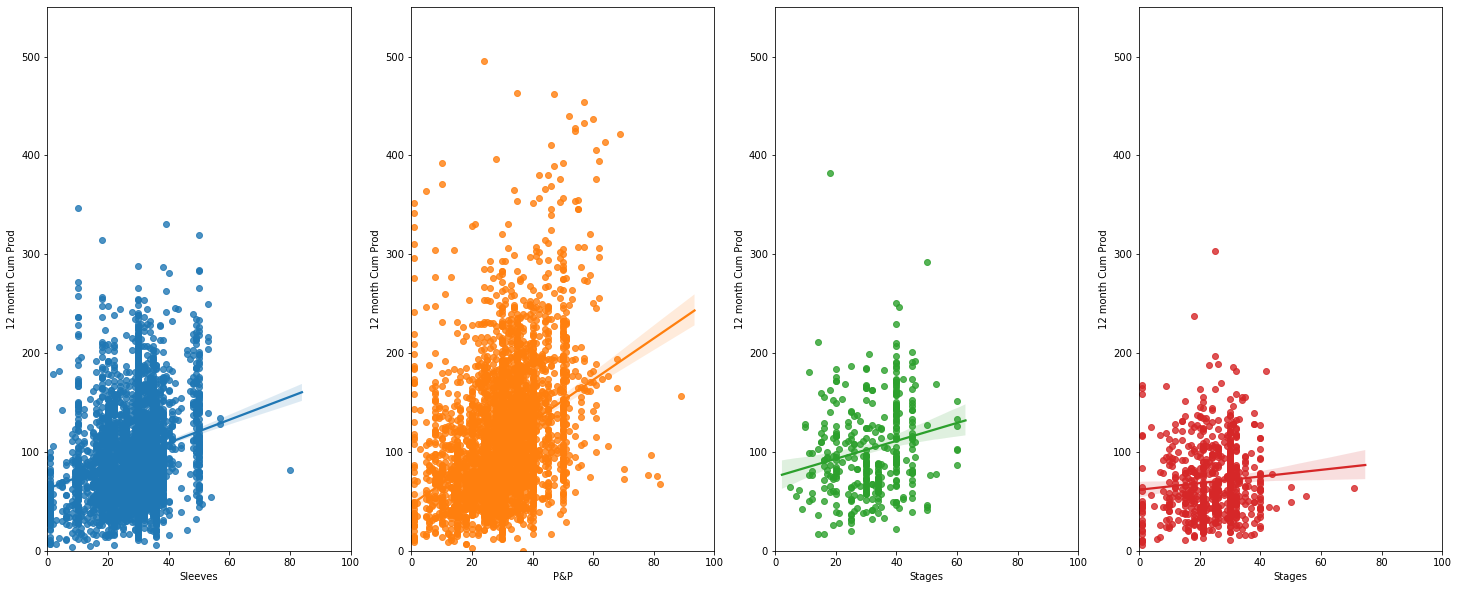

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (25,10))

axesList = [ax1,ax2,ax3,ax4]

sns.regplot(x = 'Sleeves', y = '12 month Cum Prod', data = DatabaseDF[DatabaseDF['Completion Type'] == 'Sleeves'], ax = ax1)

sns.regplot(x = 'P&P', y = '12 month Cum Prod', data = DatabaseDF[DatabaseDF['Completion Type'] == 'P & P'], ax = ax2)

sns.regplot(x = 'Stages', y = '12 month Cum Prod', data = DatabaseDF[DatabaseDF['Completion Type'] == 'Sleeves and P & P'], ax = ax3)

sns.regplot(x = 'Stages', y = '12 month Cum Prod', data = DatabaseDF[DatabaseDF['Completion Type'] == 'OH'], ax = ax4)

for axes in axesList:
    axes.set(xlim = (0, 100))
    axes.set(ylim = (0, 550))

plt.show()


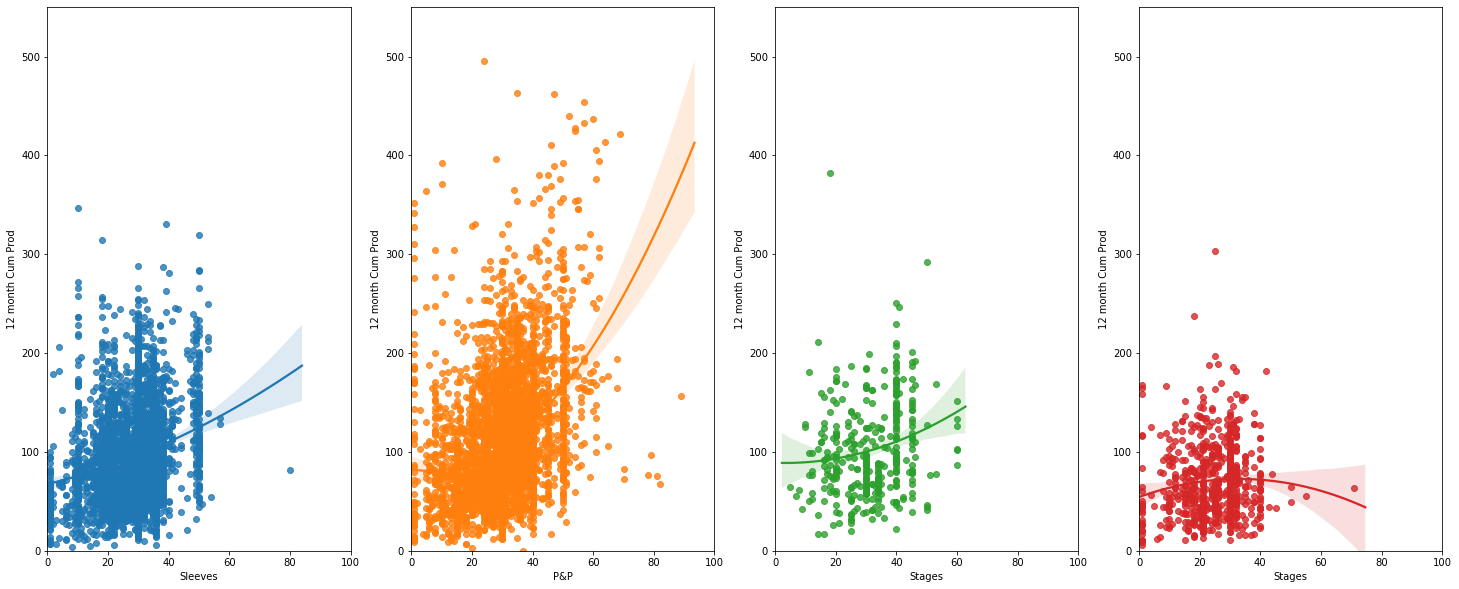

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (25,10))

axesList = [ax1,ax2,ax3,ax4]

sns.regplot(x = 'Sleeves', y = '12 month Cum Prod', data = DatabaseDF[DatabaseDF['Completion Type'] == 'Sleeves'], ax = ax1, order = 2)

sns.regplot(x = 'P&P', y = '12 month Cum Prod', data = DatabaseDF[DatabaseDF['Completion Type'] == 'P & P'], ax = ax2, order = 2)

sns.regplot(x = 'Stages', y = '12 month Cum Prod', data = DatabaseDF[DatabaseDF['Completion Type'] == 'Sleeves and P & P'], ax = ax3, order = 2)

sns.regplot(x = 'Stages', y = '12 month Cum Prod', data = DatabaseDF[DatabaseDF['Completion Type'] == 'OH'], ax = ax4, order = 2)

for axes in axesList:
    axes.set(xlim = (0, 100))
    axes.set(ylim = (0, 550))

plt.show()


Now I want to try and analyze the effects that having a split Sleeves and P&P completion type would have on total oil

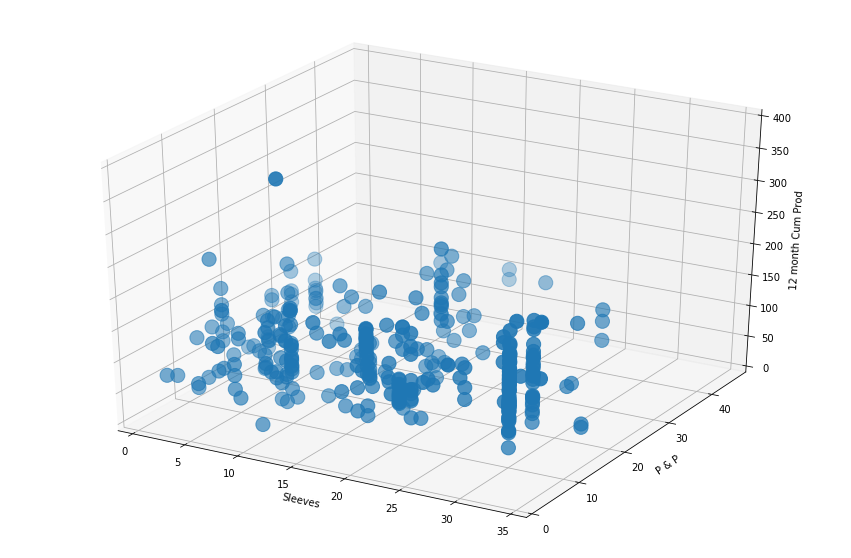

In [11]:
filteredDF = DatabaseDF[DatabaseDF['Completion Type'] == 'Sleeves and P & P']

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(filteredDF['Sleeves'], filteredDF['P&P'], filteredDF['12 month Cum Prod'], s = 200)
ax.set(xlabel = 'Sleeves', ylabel = 'P & P', zlabel = '12 month Cum Prod')

plt.show()

(Note: use the python file to move the graph and make it more readable)

This was not at all what I was expecting, perhaps it is because of the small dataset but I expected production to increase as both sleeves and P&P increased. This however shows a much less clean cut graph where it seems almost arbitrary how many stages of each you use. The highest producing well used 10 of each, but looking at each completion type indpendently it looks like they have no affect as they change.

## Attempting to Calculate the value a stage is worth

In [12]:
import statsmodels.api as sm
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

from patsy import dmatrices

In [13]:
y, X = dmatrices("Q('12 month Cum Prod') ~ Stages", data = DatabaseDF, return_type = 'dataframe')

mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

OLS Regression Results                              
Dep. Variable:     Q('12 month Cum Prod')   R-squared:                       0.119
Model:                                OLS   Adj. R-squared:                  0.119
Method:                     Least Squares   F-statistic:                     1441.
Date:                    Wed, 03 Jun 2020   Prob (F-statistic):          6.84e-296
Time:                            19:33:20   Log-Likelihood:                -57159.
No. Observations:                   10688   AIC:                         1.143e+05
Df Residuals:                       10686   BIC:                         1.143e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.0502      1.347     37.91

Although the R^2 value is extremely low this gives an outline for how stages impact production, and will be used as a baseline before looking at how this differs for different completion types

In [14]:
y, X = dmatrices("Q('12 month Cum Prod') ~ Sleeves", data = DatabaseDF[DatabaseDF['Completion Type'] == 'Sleeves'], return_type='dataframe')

SleeveModel = sm.OLS(y,X)
SleeveRes = SleeveModel.fit()

print(SleeveRes.summary())

OLS Regression Results                              
Dep. Variable:     Q('12 month Cum Prod')   R-squared:                       0.057
Model:                                OLS   Adj. R-squared:                  0.057
Method:                     Least Squares   F-statistic:                     253.9
Date:                    Wed, 03 Jun 2020   Prob (F-statistic):           1.46e-55
Time:                            19:33:20   Log-Likelihood:                -21978.
No. Observations:                    4216   AIC:                         4.396e+04
Df Residuals:                        4214   BIC:                         4.397e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.7410      2.185     28.71

In [15]:
y, X = dmatrices("Q('12 month Cum Prod') ~ Q('P&P')", data = DatabaseDF[DatabaseDF['Completion Type'] == 'P & P'], return_type='dataframe')

PandPModel = sm.OLS(y, X)
PandPRes = PandPModel.fit()

print(PandPRes.summary())

OLS Regression Results                              
Dep. Variable:     Q('12 month Cum Prod')   R-squared:                       0.124
Model:                                OLS   Adj. R-squared:                  0.124
Method:                     Least Squares   F-statistic:                     684.9
Date:                    Wed, 03 Jun 2020   Prob (F-statistic):          2.75e-141
Time:                            19:33:20   Log-Likelihood:                -26267.
No. Observations:                    4830   AIC:                         5.254e+04
Df Residuals:                        4828   BIC:                         5.255e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.8933      2.535     18.49

Next I will try to combine both of these to gain an understanding of how they interact

In [16]:
FilterList = ['P & P', 'Sleeves', 'Sleeves and P & P']

zerodDatabase = DatabaseDF.fillna(0)

y, X = dmatrices("Q('12 month Cum Prod') ~ Q('Sleeves') + Q('P&P')", data = zerodDatabase[zerodDatabase['Completion Type'].isin(FilterList)], return_type='dataframe')

CompModel = sm.OLS(y, X)
CompRes = CompModel.fit()

print(CompRes.summary())

OLS Regression Results                              
Dep. Variable:     Q('12 month Cum Prod')   R-squared:                       0.107
Model:                                OLS   Adj. R-squared:                  0.107
Method:                     Least Squares   F-statistic:                     568.3
Date:                    Wed, 03 Jun 2020   Prob (F-statistic):          8.51e-234
Time:                            19:33:20   Log-Likelihood:                -50551.
No. Observations:                    9455   AIC:                         1.011e+05
Df Residuals:                        9452   BIC:                         1.011e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       57.4144      1.604    

In [17]:
SleeveToPandP = (CompRes.params["Q('Sleeves')"]/CompRes.params["Q('P&P')"])

PandPToSleeve = (CompRes.params["Q('P&P')"]/CompRes.params["Q('Sleeves')"])

print(SleeveToPandP)
print(PandPToSleeve)

0.7517477834218766
1.3302333868523104


1 Sleeve is worth .751747 P&P Stages based on Oil as the Utility and
1 P&P stage is worth 1.330233 Sleeves based on the utility

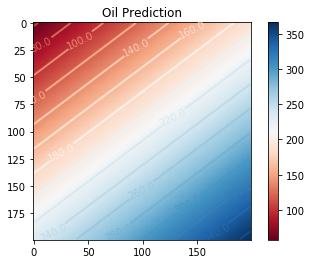

In [18]:
def predictOil(x, y):
    return CompRes.predict([1,x,y])[0]

x = np.arange(0, 100, .5)
y = np.arange(0, 100, .5)

X,Y = meshgrid(x,y)
Z = predictOil(X,Y)

im = imshow(Z,cmap=cm.RdBu)

title('Oil Prediction')

cset = contour(Z,np.arange(0,400,20),linewidths=2,cmap=cm.RdBu)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)

colorbar(im)

show()

In [19]:
def linearEdgeworthBox(E1, E2, coefficients):
    totalSleeves = E1[0] + E2[0]
    totalPandP = E1[1] + E2[1]

    fig = plt.figure()
    ax = plt.axes()

    plt.xlim(0, totalSleeves)
    plt.ylim(0,totalPandP)

    x = np.linspace(0,totalSleeves, totalSleeves * 100)

    plt.plot(E1[0], E1[1], 'ro', color = 'green')

    P1_InitialZ = (1 * coefficients[0]) + (E1[0] * coefficients[1]) + (E1[1] * coefficients[2])

    ax.plot(x, ((1 * coefficients[0]) + (x * coefficients[1]) - P1_InitialZ)/(-1* coefficients[2]), color = 'red')
    
    plt.show()

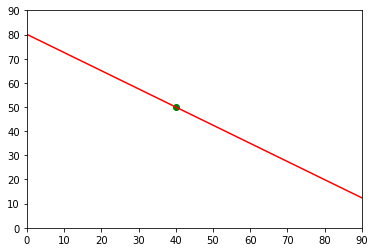

In [20]:
linearEdgeworthBox([40,50],[50,40],[1,1.33,1.77])

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = [[0.44, 0.68], [0.99, 0.23]]
vector = [109.85, 155.72]
predict= [[0.44, 0.68]]

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = linear_model.LinearRegression()
clf.fit(X_, vector)
print (clf.predict(predict_))

[109.85]


In [22]:
FilterList = ['Sleeves', 'P & P', 'Sleeves and P & P']

CumOilCount = DatabaseDF[DatabaseDF['Completion Type'].isin(FilterList)]['12 month Cum Prod'].fillna(0)
SleeveCount = DatabaseDF[DatabaseDF['Completion Type'].isin(FilterList)]['Sleeves'].fillna(0)
PandPCount = DatabaseDF[DatabaseDF['Completion Type'].isin(FilterList)]['P&P'].fillna(0)

VariableDF = pd.concat([SleeveCount,PandPCount], axis = 1)

XOrig = VariableDF.values
yOrig = list(CumOilCount)

split = round(len(XOrig)*.9)

XTrain = XOrig[:split]
XTest = XOrig[split:]
yTrain = yOrig[:split]
yTest = yOrig[split:]

poly = PolynomialFeatures(degree = 2)
XTrain_Transformed= poly.fit_transform(XTrain)
XTest_Transformed = poly.fit_transform(XTest)

clf = linear_model.LinearRegression()
clf.fit(XTrain_Transformed,yTrain)

predictions = clf.predict(XTest_Transformed)

In [23]:
def oilEstimator(Sleeves, PandP):
    X = [[Sleeves,PandP]]
    XTransormed = poly.fit_transform(X)

    return clf.predict(XTransormed)[0]

In [24]:
import pyEdgeworthBox as eb

In [25]:
EB=eb.EdgeBox(  u1 = oilEstimator
               , u2= oilEstimator
               , IE1=[37,62]
               , IE2=[(100-37),(100-62)])

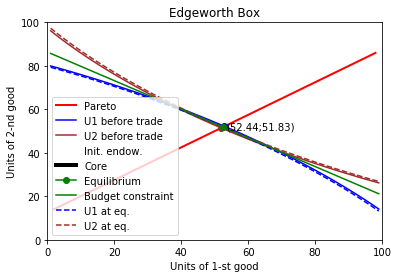

In [26]:
EB.plot()